# Predicting the Stability of Metal-Organic Frameworks (MOFs) Using RDKit

## Introduction
Metal-Organic Frameworks (MOFs) are porous materials with applications in gas storage, catalysis, and more. Predicting their stability under various conditions is crucial for their practical use. This project uses RDKit to calculate molecular descriptors for MOFs and a machine learning model to predict their stability.

### Goals:
1. Collect and preprocess MOF data.
2. Calculate molecular descriptors using RDKit.
3. Train a machine learning model to predict MOF stability.
4. Evaluate and visualize the model's performance.


## Step 1: Install Required Libraries
Let's start by installing the necessary Python libraries, including RDKit, scikit-learn, pandas, numpy, matplotlib, and seaborn.


In [1]:
!conda install -c conda-forge rdkit -y

!pip install scikit-learn pandas numpy matplotlib seaborn

'conda' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 2: Data Collection
For this project, we'll use a simulated dataset containing MOFs with known stability scores. In a real-world scenario, you could collect data from the Cambridge Structural Database (CSD) or other sources.

In [2]:
import pandas as pd

data = {
    'MOF_ID': ['MOF1', 'MOF2', 'MOF3', 'MOF4', 'MOF5'],
    'SMILES': ['C1=CC=C(C=C1)C(=O)O', 'C1=CC=CC=C1', 'C1=CN=CN=C1', 'C1=CC=C(C=C1)C(=O)O', 'C1=CC=CC=C1'],
    'Stability_Score': [0.95, 0.78, 0.88, 0.91, 0.72]
}

df = pd.DataFrame(data)
df.head()

,MOF_ID,SMILES,Stability_Score
0,MOF1,C1=CC=C(C=C1)C(=O)O,0.95
1,MOF2,C1=CC=CC=C1,0.78
2,MOF3,C1=CN=CN=C1,0.88
3,MOF4,C1=CC=C(C=C1)C(=O)O,0.91
4,MOF5,C1=CC=CC=C1,0.72


## Step 3: Molecular Descriptor Calculation Using RDKit
We will use RDKit to calculate molecular descriptors for each MOF in our dataset. These descriptors will be used as features in our machine learning model.

In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol)
    }
    return descriptors

df_descriptors = df['SMILES'].apply(calculate_descriptors).apply(pd.Series)
df = pd.concat([df, df_descriptors], axis=1)
df.head()

,MOF_ID,SMILES,Stability_Score,MolWt,NumRotatableBonds,NumHDonors,NumHAcceptors
0,MOF1,C1=CC=C(C=C1)C(=O)O,0.95,122.123,1.0,1.0,1.0
1,MOF2,C1=CC=CC=C1,0.78,78.114,0.0,0.0,0.0
2,MOF3,C1=CN=CN=C1,0.88,80.090,0.0,0.0,2.0
3,MOF4,C1=CC=C(C=C1)C(=O)O,0.91,122.123,1.0,1.0,1.0
4,MOF5,C1=CC=CC=C1,0.72,78.114,0.0,0.0,0.0


## Step 4: Data Preprocessing
Next, we will split the data into training and testing sets and standardize the features to prepare them for model training.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['MolWt', 'NumRotatableBonds', 'NumHDonors', 'NumHAcceptors']]
y = df['Stability_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Model Training
We'll train a Random Forest model to predict the stability of MOFs based on the calculated molecular descriptors.


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.0014666666666673933


## Step 6: Visualization
Let's visualize the feature importance to understand which molecular descriptors contribute the most to the stability prediction.

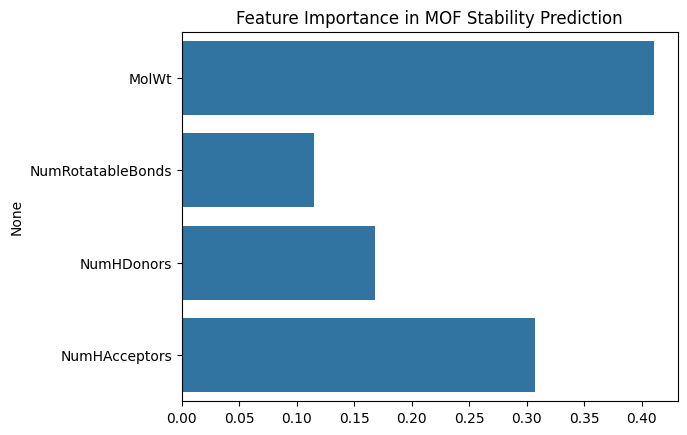

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in MOF Stability Prediction')
plt.show()

## Step 7: Model Deployment
Finally, we'll create a function that allows users to input a SMILES string representing a MOF's organic linker and get a predicted stability score.


In [7]:
def predict_stability(smiles):
    descriptors = calculate_descriptors(smiles)
    features = scaler.transform([list(descriptors.values())])
    prediction = model.predict(features)
    return prediction[0]

example_smiles = 'C1=CC=C(C=C1)C(=O)O'
predicted_stability = predict_stability(example_smiles)
print(f'Predicted Stability Score: {predicted_stability}')

Predicted Stability Score: 0.9240666666666669


c:\Users\ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Conclusion and Next Steps
In this project, we successfully predicted the stability of MOFs using RDKit to calculate molecular descriptors and a Random Forest model.

### Potential Improvements:
1. **Expand the dataset**: Incorporate more MOFs with diverse structures and stability data.
2. **Explore advanced models**: Use more complex models like neural networks or ensemble methods.
3. **Add more descriptors**: Experiment with additional molecular descriptors or custom features.


## References and Acknowledgments
- RDKit documentation: [RDKit Documentation](https://www.rdkit.org/docs/)
- Scikit-learn documentation: [Scikit-learn Documentation](https://scikit-learn.org/stable/)
- Dataset sources: Potentially from [Cambridge Structural Database](https://www.ccdc.cam.ac.uk/solutions/csd-system/components/csd/).

Special thanks to the open-source community for providing tools like RDKit and scikit-learn.
